In [7]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from heapq import nlargest
import random

In [20]:
study_material = """
    Climate change has emerged as one of the biggest challenges facing humanity. Global warming, primarily caused by human activity, leads to rising sea levels, unpredictable weather patterns, and a growing number of natural disasters. Scientists agree that immediate action is necessary to reduce carbon emissions and limit the detrimental effects of climate change. Governments, businesses, and individuals must work together to implement sustainable solutions such as renewable energy, energy efficiency, and conservation. Failure to act will result in irreversible damage to ecosystems and future generations.
    """

In [34]:

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower()  
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [35]:

print("processed text")
preprocessed_text = preprocess_text(study_material)
print(preprocessed_text)

processed text
machine learning branch artificial intelligence focus building system learn data python popular programming language machine learning


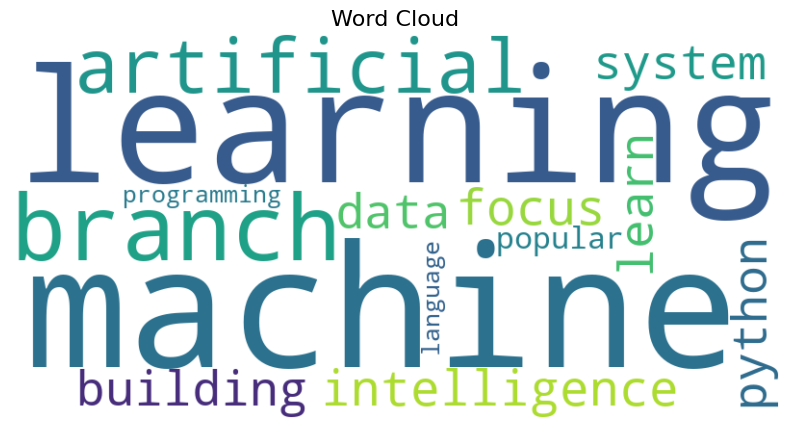

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud", fontsize=16)
    plt.show()

generate_wordcloud(preprocessed_text)



C:\Users\Admin\AppData\Local\Temp\ipykernel_8680\3099011003.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(keywords), palette="viridis")


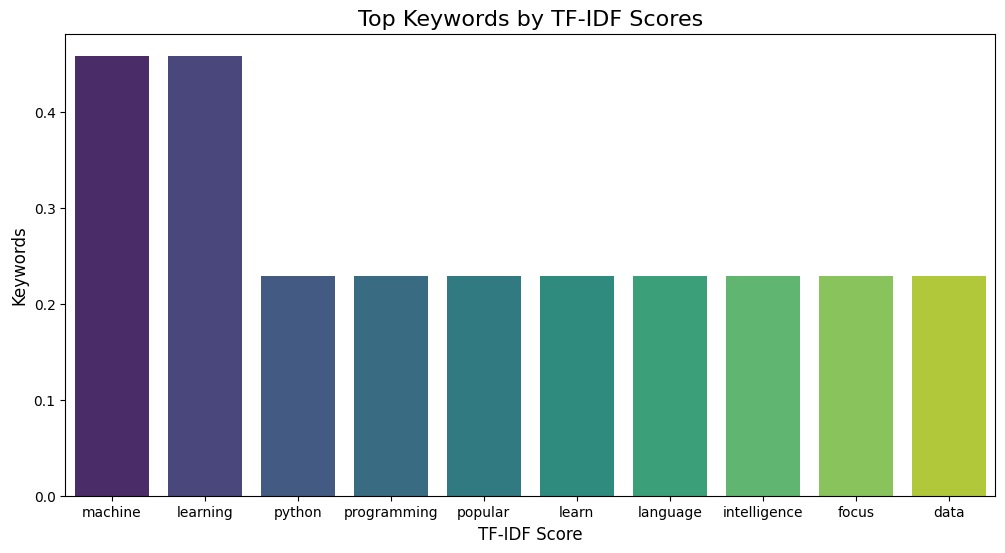

In [37]:
def keyword_frequency(text, num_keywords=10):
    tfidf_vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    keyword_scores = sorted(zip(tfidf_scores, feature_names), reverse=True)[:num_keywords]
    keywords, scores = zip(*keyword_scores)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(scores), y=list(keywords), palette="viridis")
    plt.title("Top Keywords by TF-IDF Scores", fontsize=16)
    plt.xlabel("TF-IDF Score", fontsize=12)
    plt.ylabel("Keywords", fontsize=12)
    plt.show()

keyword_frequency(preprocessed_text)


In [38]:

def summarize_text(text, num_sentences=3):
    sentences = sent_tokenize(text)
    tfidf_vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    
    sentence_scores = {}
    for i, sentence in enumerate(sentences):
        score = tfidf_matrix[i].sum()
        sentence_scores[sentence] = score
    
   
    summarized_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    return summarized_sentences

In [39]:
print("summarized sentences")
summarized_sentences = summarize_text(study_material, num_sentences=3)
print(summarized_sentences)

summarized sentences
['Python is a popular programming language for machine learning."', 'It focuses on building systems that can learn from data.', '\n    "Machine learning is a branch of artificial intelligence.']


In [40]:

def extract_keywords(text, num_keywords=5):
    tfidf_vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
   
    keywords = [feature_names[i] for i in tfidf_scores.argsort()[-num_keywords:][::-1]]
    return keywords

In [41]:

print("keywords")
keywords = extract_keywords(preprocessed_text, num_keywords=5)
print(keywords)

keywords
['machine', 'learning', 'python', 'programming', 'popular']


In [42]:


def generate_quiz(summarized_sentences, keywords, num_questions=5):
    quiz = []
    
    
    for sentence in summarized_sentences:
        words = sentence.split()
        for keyword in keywords:
            if keyword in words:
                question = sentence.replace(keyword, "______")
                quiz.append({"type": "Fill-in-the-Blank", "question": question, "answer": keyword})
                break
        if len(quiz) >= num_questions:
            break
    
    
    for sentence in summarized_sentences:
        quiz.append({"type": "True/False", "question": f"True/False: {sentence}", "answer": "True"})
        if len(quiz) >= num_questions:
            break
    
    return quiz[:num_questions]


In [43]:


def display_quiz(quiz):
    print("Generated Quiz:")
    for i, q in enumerate(quiz, 1):
        print(f"Q{i}: {q['type']} - {q['question']}")
        print(f"Answer: {q['answer']}")
        print("-" * 50)


In [44]:

quiz = generate_quiz(summarized_sentences, keywords, num_questions=5)
    

display_quiz(quiz)


Generated Quiz:
Q1: Fill-in-the-Blank - Python is a popular programming language for ______ learning."
Answer: machine
--------------------------------------------------
Q2: Fill-in-the-Blank - 
    "Machine ______ is a branch of artificial intelligence.
Answer: learning
--------------------------------------------------
Q3: True/False - True/False: Python is a popular programming language for machine learning."
Answer: True
--------------------------------------------------
Q4: True/False - True/False: It focuses on building systems that can learn from data.
Answer: True
--------------------------------------------------
Q5: True/False - True/False: 
    "Machine learning is a branch of artificial intelligence.
Answer: True
--------------------------------------------------


In [45]:


if __name__ == "__main__":
    study_material = """
    "Machine learning is a branch of artificial intelligence. It focuses on building systems that can learn from data. Python is a popular programming language for machine learning." """
    preprocessed_text = preprocess_text(study_material)
    summarized_sentences = summarize_text(study_material, num_sentences=3)
    keywords = extract_keywords(preprocessed_text, num_keywords=5)
    quiz = generate_quiz(summarized_sentences, keywords, num_questions=5)
    display_quiz(quiz)


Generated Quiz:
Q1: Fill-in-the-Blank - Python is a popular programming language for ______ learning."
Answer: machine
--------------------------------------------------
Q2: Fill-in-the-Blank - 
    "Machine ______ is a branch of artificial intelligence.
Answer: learning
--------------------------------------------------
Q3: True/False - True/False: Python is a popular programming language for machine learning."
Answer: True
--------------------------------------------------
Q4: True/False - True/False: It focuses on building systems that can learn from data.
Answer: True
--------------------------------------------------
Q5: True/False - True/False: 
    "Machine learning is a branch of artificial intelligence.
Answer: True
--------------------------------------------------
